# Distributions of weights in ResNet34 and ResNet50
In this notebook we will compare the distribution of weights from two almost identical architectures. More information about what different architectures you can read in [this](./../../tutorials/06_detailed_model_usage.ipynb) notebook.

In [1]:
import sys

sys.path.append('../../utils')

import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_weights

First of all, load the weights that we saved in the tutorials.

In [2]:
bottle_weights_path = 'path/with/saved_bottle_weights.pkl'
res_weights_path = 'path/with/saved_res_weights.pkl'

with open(bottle_weights_path, 'rb') as f:
    bottle_names, bottle_weights, bottle_params = pickle.load(f)
with open(res_weights_path', 'rb') as f:
    res_names, res_weights, res_params = pickle.load(f)

Below is drawn the distribution of weights of 0, 4th, 7th, 14th blocks from the ResNet50 model. Drawing function you can see in [utils](./../../utils/utils.py).

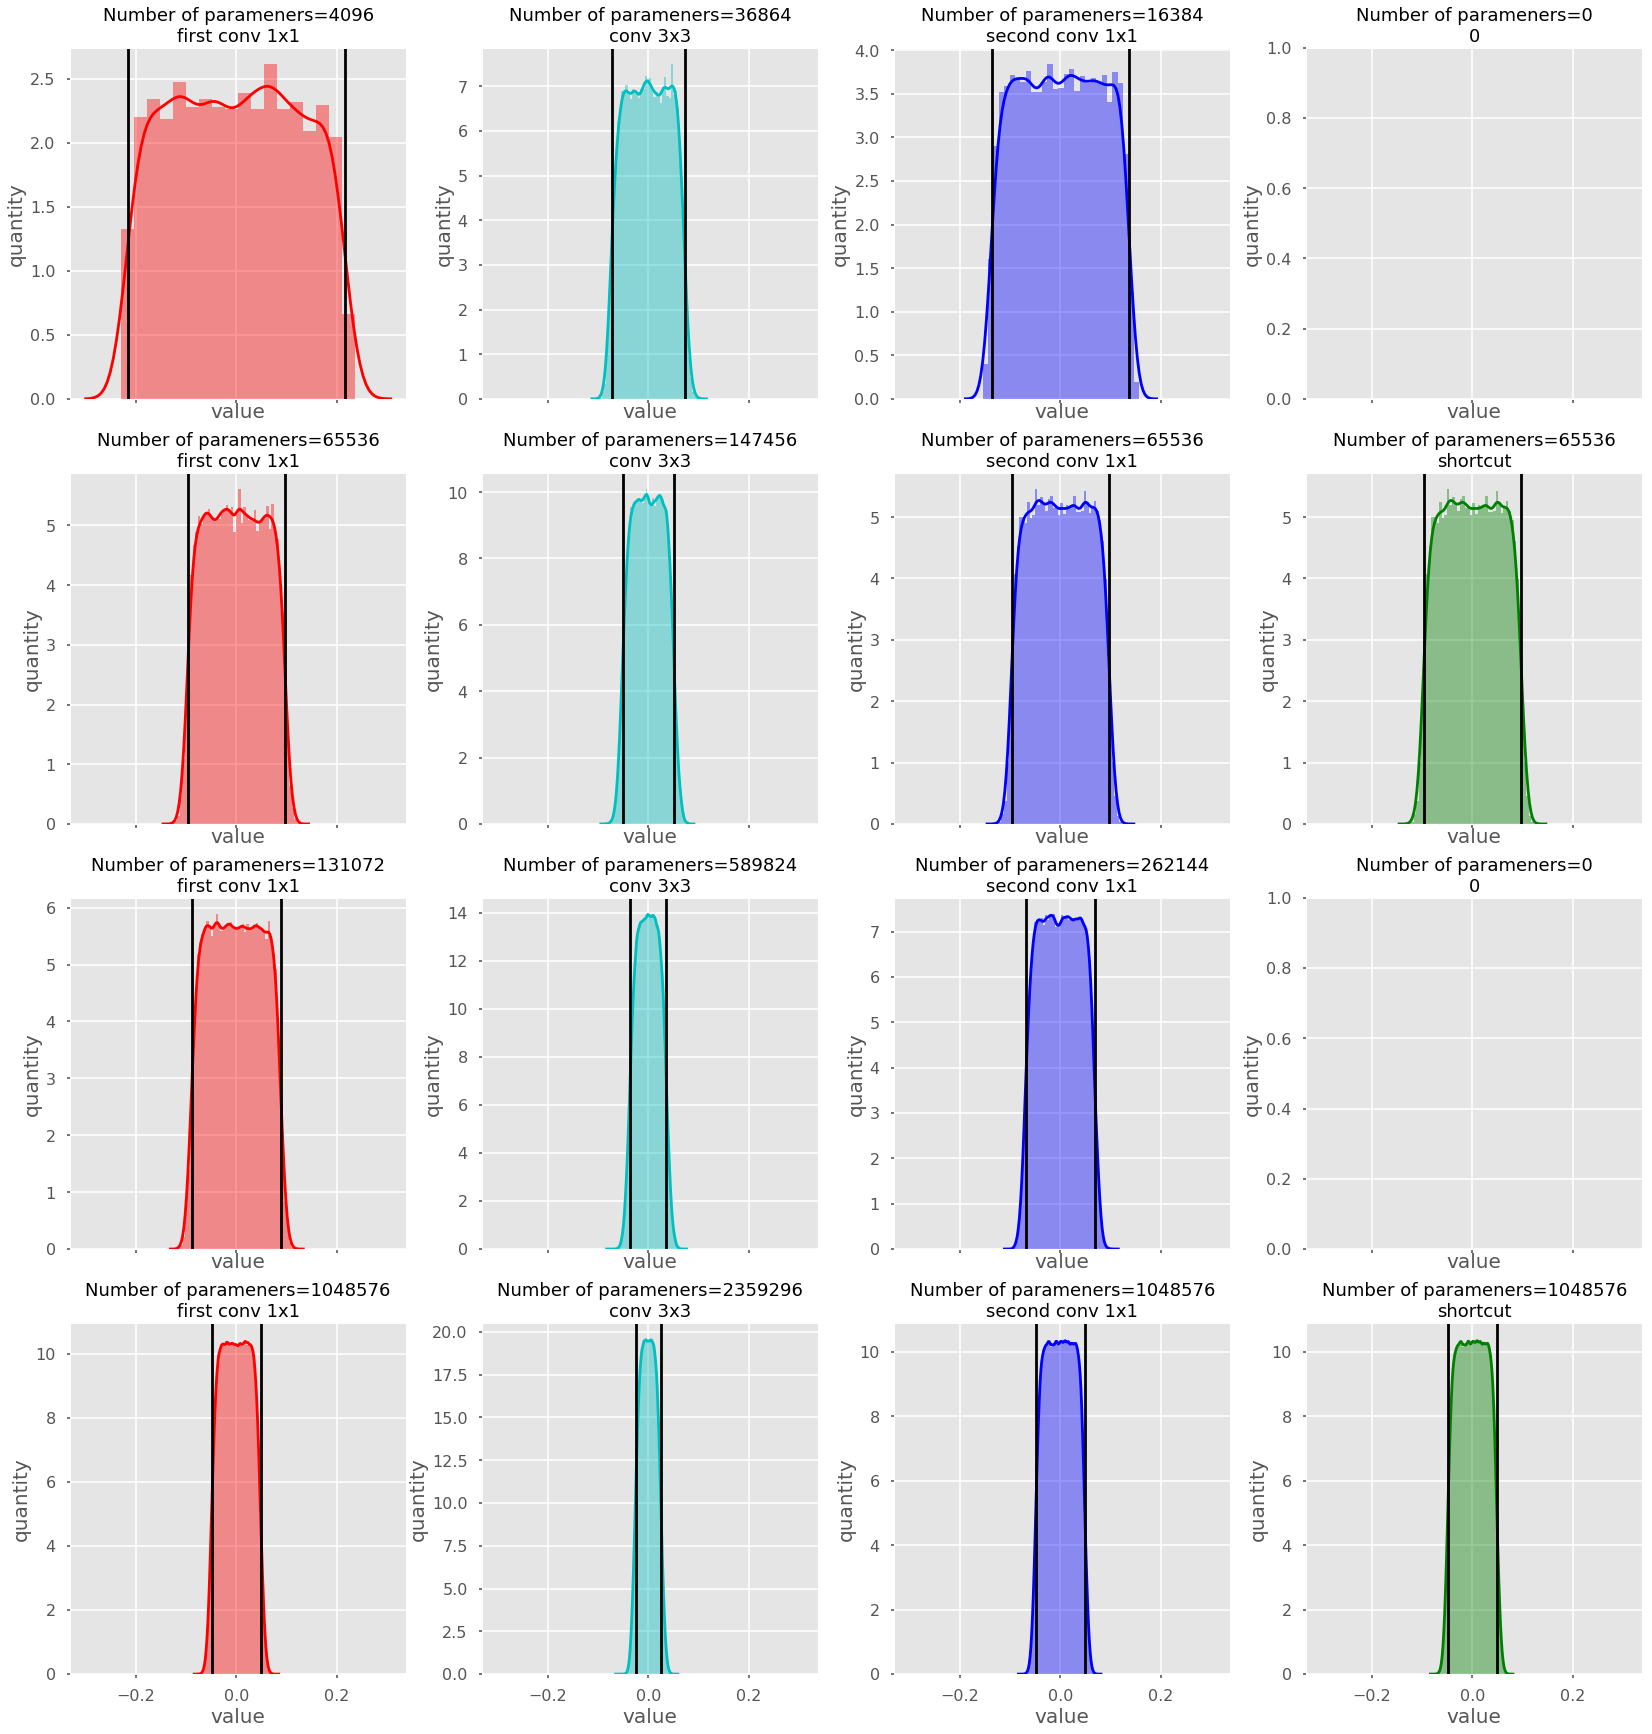

In [3]:
plot_weights(bottle_names, bottle_weights, bottle_params, ['r', 'c', 'b', 'g'], [4, 4], [0, 4, 7, 14])

It's not difficult to notice, that distribution of 1x1 convolutions has a larger variance than in 3x3 convolution. Therefore, they put a stronger influence on the output.

 __Black lines show the initial distribution of weights__

______

Now let's draw distribution of 0th, 3rd, 7th, 14th blocks from the ResNet34 model.

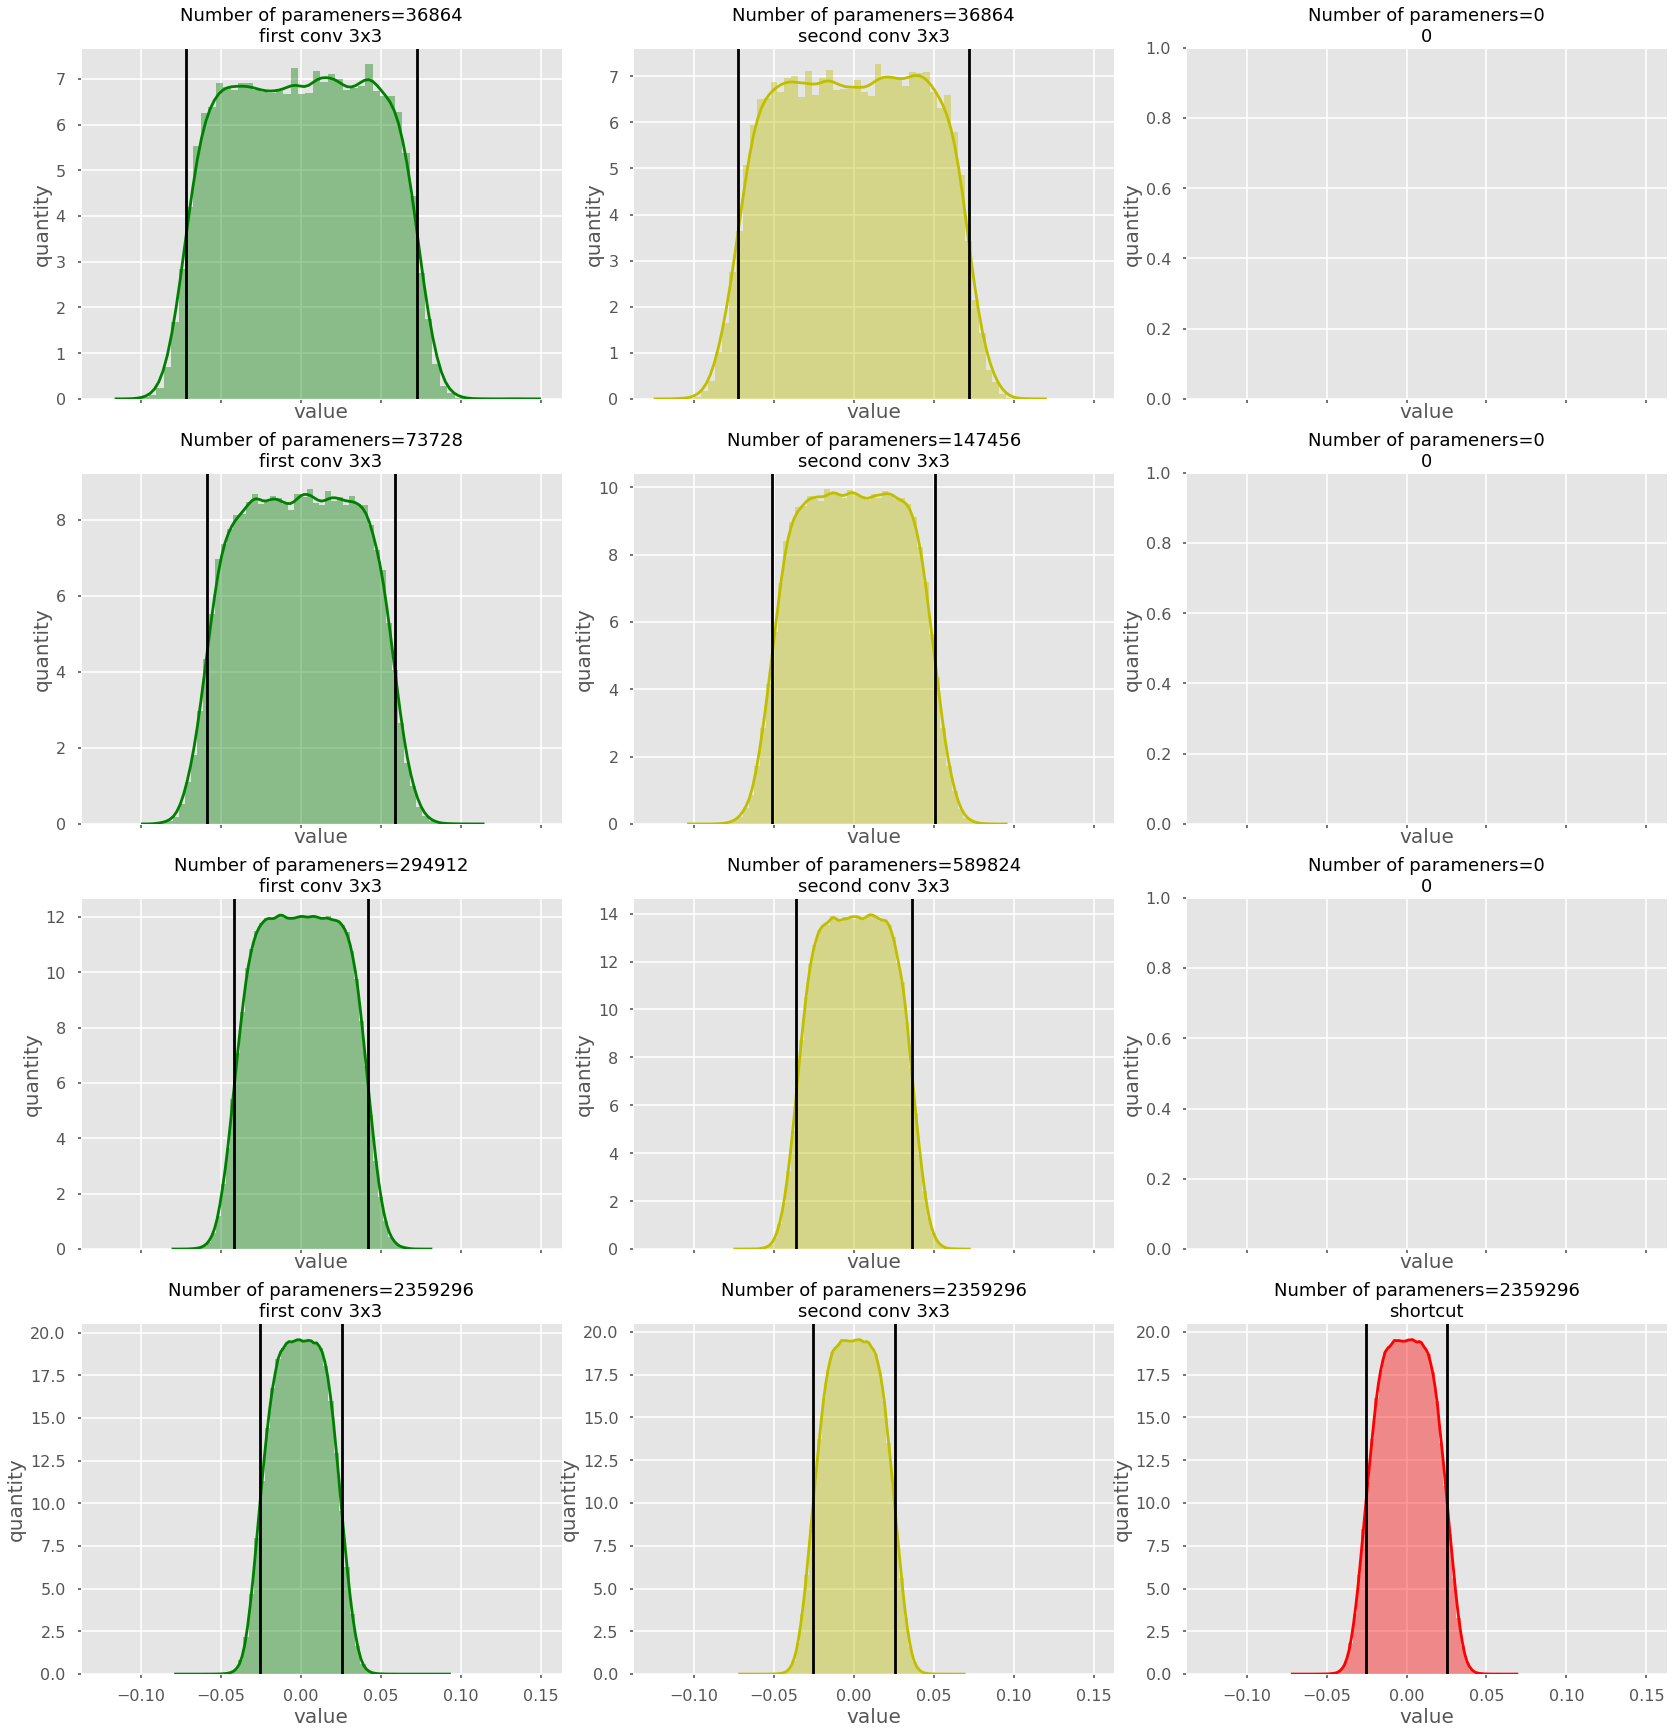

In [4]:
plot_weights(res_names, res_weights, res_params, ['g', 'y', 'r'], [4, 3], [0, 3, 7, 14], bottleneck=False)

It is not difficult to see that the distribution of the first and the second 3x3 convolutions are the same.

____

Now, let's compare the distribution of the second layer of ResNet34 architecture and the 3х3 layer of ResNet50 from 3rd, 6th, 9th, 13th blocks. Will they be the same?

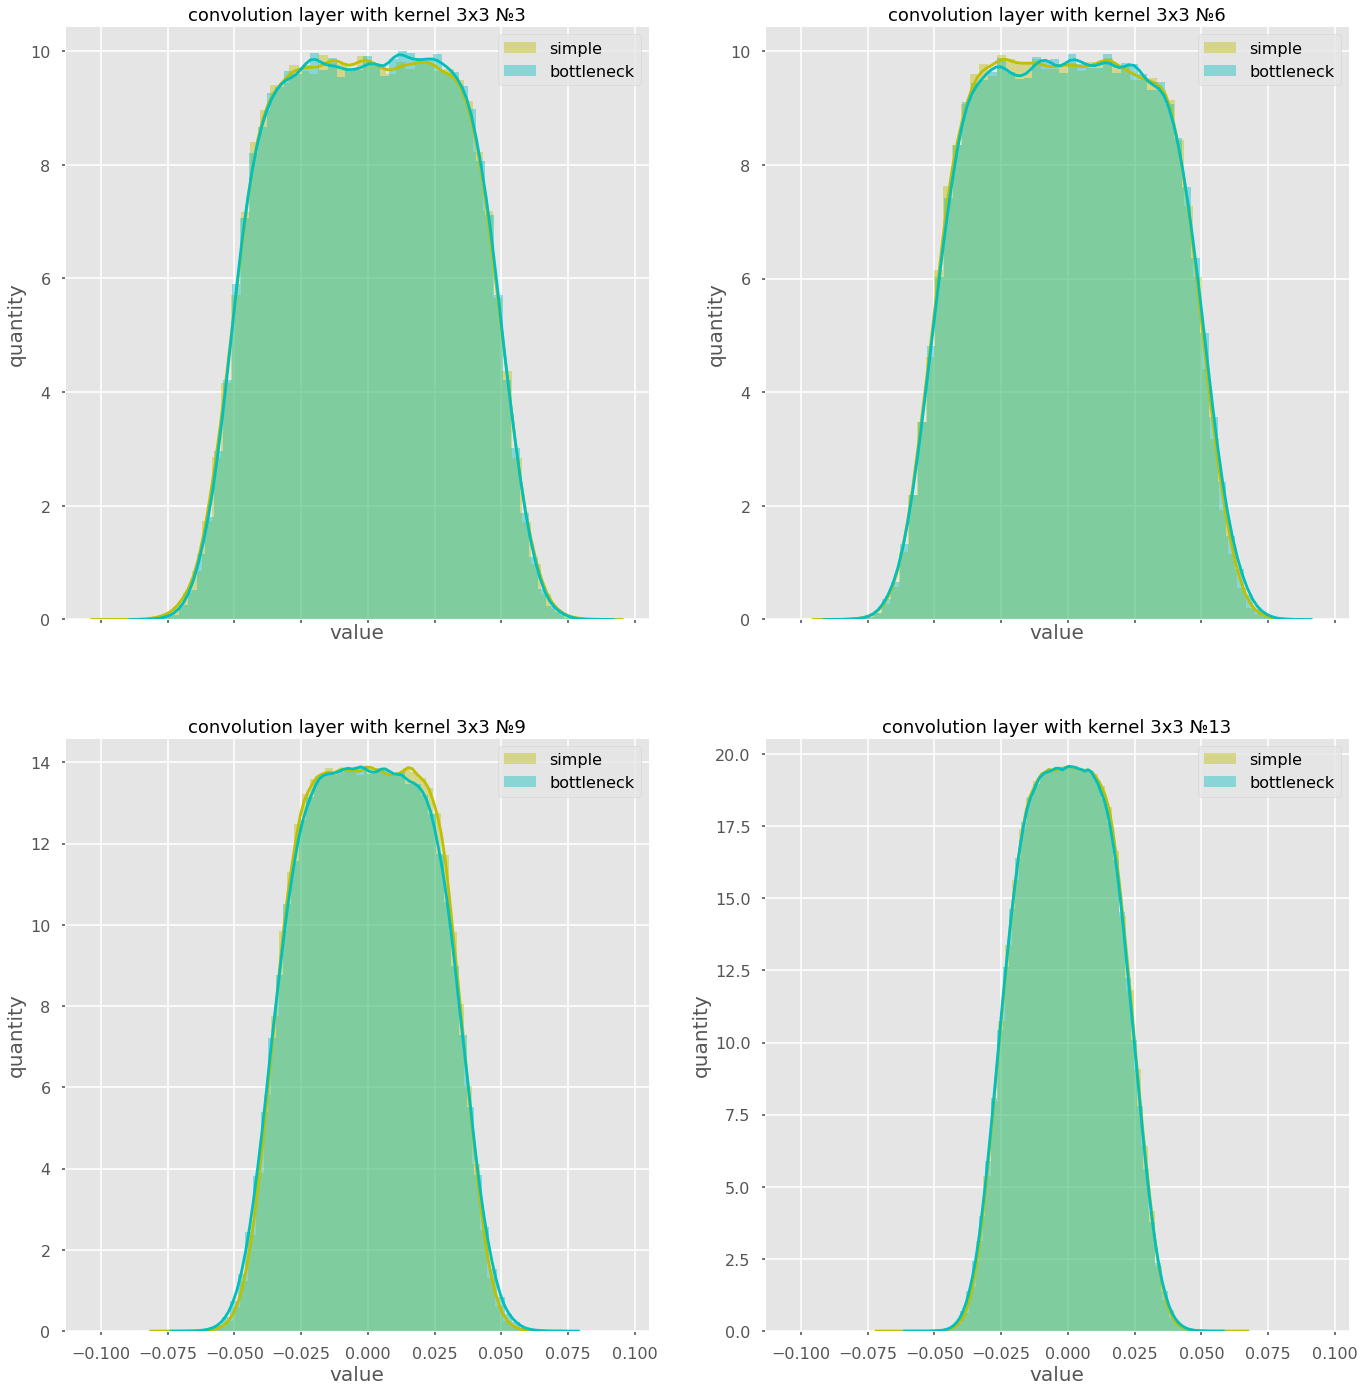

In [5]:
indices = [i for i in range(len(bottle_names)) if 'conv' in bottle_names[i][:8]]
_, ax = plt.subplots(2, 2, sharex='all', figsize=(23, 24))
ax = ax.reshape(-1)
num_plot = 0
num_blocks = [3, 6, 9, 13]
res_layers = np.where(res_names == 'layer-4')[0][num_blocks]
bottle_layers = np.where(bottle_names == 'layer-4')[0][num_blocks]
for i,j in zip(res_layers, bottle_layers):
    ax[num_plot].set_title('convolution layer with kernel 3x3 №{}'.format(num_blocks[num_plot]), fontsize=18)
    sns.distplot(res_weights[i].reshape(-1), ax=ax[num_plot], color='y', label='simple')
    sns.distplot(bottle_weights[j].reshape(-1), ax=ax[num_plot], color='c', label='bottleneck')
    ax[num_plot].legend()
    ax[num_plot].set_xlabel('value', fontsize=20)
    ax[num_plot].set_ylabel('quantity', fontsize=20)
    num_plot += 1
    if num_plot == ax.shape[0]:
        break
    

Graphs show, that its distributions are the same. Therefore the first 3x3 convolution layer from ResNet34 replaces the two 1x1 convolutions from ResNet50.

### It's time to conclude:
* Convolutions of 1x1 size put a stronger influence on the output than 3x3.
* The distribution of all layers with the 3x3 convolutions is the same.

Read and apply another experiments:
* previous [experiment](./../augmentation/augmentation.ipynb)
* return to the [table of contents](./../experiments_description.ipynb).
    
If you still have not completed our tutorial, you can fix it right [now](./../../tutorial/00_description.ipynb)!